In [108]:
#Import Modules
import datacube
import datetime
import fiona
import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio.mask
import rasterio.features
from shapely import geometry
import seaborn as sns
import sys
import xarray as xr

import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from datacube.storage import masking
from datacube.utils import geometry
from datacube.helpers import ga_pq_fuser, write_geotiff
from datacube.helpers import write_geotiff

sys.path.append('/g/data/u46/users/ck9738/10_Scripts')
import TasseledCapTools

dc = datacube.Datacube(app='tcw')

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 

In [110]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [151]:
training_data_file = '/g/data/u46/users/ck9738/Datasets/Tasselled_cap_tifs/Glue_subsets/training_data_simpler.csv'

training_data_file_SUBSET = '/g/data/u46/users/ck9738/Datasets/Tasselled_cap_tifs/Glue_subsets/training_data_simpler_90pct.csv'

test_save = '/g/data/u46/users/ck9738/Datasets/Tasselled_cap_tifs/Glue_subsets/decision_tree_subset1.pdf'

In [152]:
#open csv with a random subset and then save that to file
training_data = pd.read_csv(training_data_file)

subset = training_data.sample(frac=0.9)
subset.to_csv(training_data_file_SUBSET)

In [153]:
training_data = pd.read_csv(training_data_file_SUBSET,usecols=['Band 1','Band 3','Band 5'])
training_array = training_data.to_numpy()
training_array

array([[1241.5445, 1786.9885, -473.0527],
       [1073.8089, 1683.0215, -330.9091],
       [1271.5948, 1839.1437, -525.2017],
       ...,
       [ 948.0888, 1338.8473, -166.6954],
       [1451.7438, 2275.05  , -716.2364],
       [1212.1778, 1613.8861, -336.0198]])

In [154]:
class_data = pd.read_csv(training_data_file_SUBSET,usecols=['CLASS'])
class_array = class_data.to_numpy()
class_array

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [155]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_array, class_array)

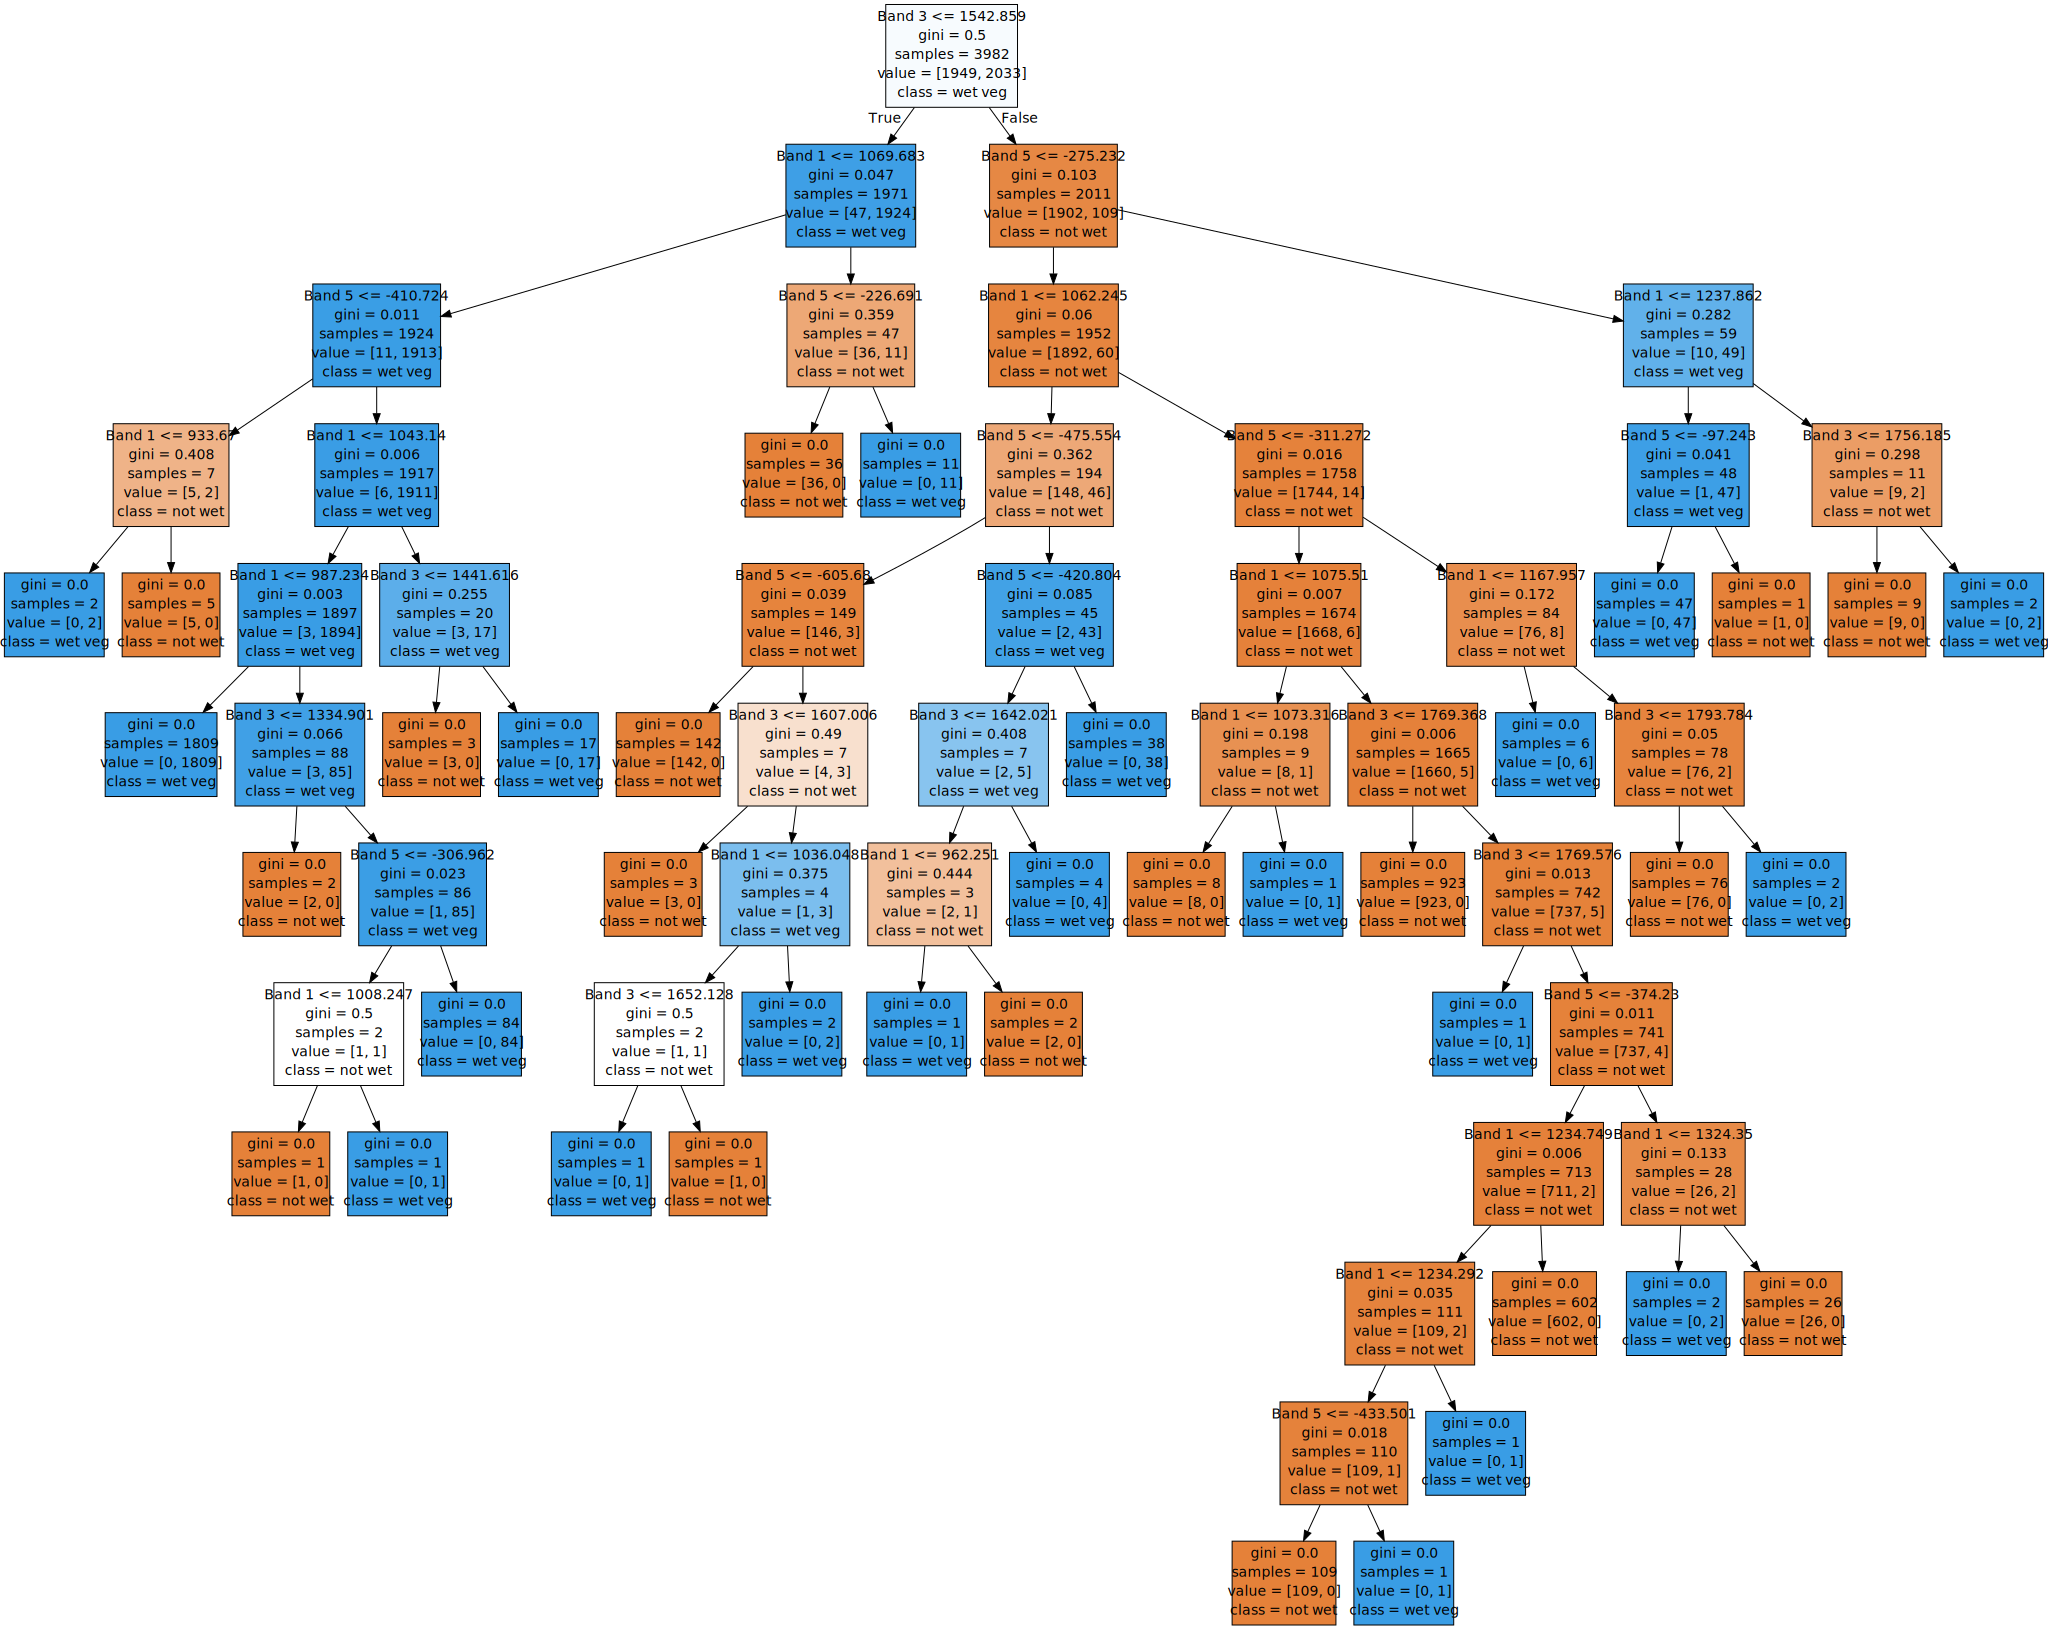

In [157]:
plot_tree = tree.export_graphviz(clf,feature_names = ['Band 1','Band 3', 'Band 5'], class_names = ['not wet', 'wet veg'],filled=True)

graph = graphviz.Source(plot_tree)  
test_save = '/g/data/u46/users/ck9738/Datasets/Tasselled_cap_tifs/Glue_subsets/decision_tree_subset1.pdf'
graph.render(test_save)
graph

In [116]:
#define area of interest
query = {
    
# #ever lasting swamp
# 'y': (-29.365, -29.489),
# 'x': (153.033, 153.200),
    
    
#lake Coleman
# 'y': (-38.103, -38.259),
# 'x': (147.098, 147.421),

         #Macquarie Marshes
# 'y': (-30.512, -30.977),
# 'x': (147.413, 147.809),
    
    #Daintree Rainforrest
# 'y': (-16.140, -16.209),
# 'x': (145.394, 145.460),    

    
    #Big Gunbower
# 'y': (-35.636, -35.905),
# 'x': (144.102, 144.387),
    
# jerrabombera wetland
#'y': (-35.288, -35.346),
#'x': (149.139, 149.191),

#ACT
# 'y': (-35.270, -35.336),
# 'x': (149.021, 149.194),    

    #lake george
# 'y': (-34.957, -35.221),
# 'x': (149.294, 149.519),   
    
#Kowen
# 'y': (-35.269, -35.354),
# 'x': (149.239, 149.396),   
    
#gunbower
'y': (-35.743, -35.909),
'x': (144.235, 144.387),
    
    
'time': ('2018-08-04', '2018-09-30'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (-25, 25)
}

In [117]:
#load data
data_lst8 = dc.load(product='ls8_nbart_albers', group_by='solar_day', **query)
data_lst8

<xarray.Dataset>
Dimensions:          (time: 7, x: 618, y: 788)
Coordinates:
  * time             (time) datetime64[ns] 2018-08-12T00:08:38 ... 2018-09-29T00:08:57
  * y                (y) float64 -3.958e+06 -3.958e+06 ... -3.977e+06 -3.977e+06
  * x                (x) float64 1.102e+06 1.102e+06 ... 1.118e+06 1.118e+06
Data variables:
    coastal_aerosol  (time, y, x) int16 366 392 347 344 344 ... 447 462 458 447
    blue             (time, y, x) int16 332 377 334 326 329 ... 398 414 423 409
    green            (time, y, x) int16 483 529 462 451 451 ... 519 518 532 525
    red              (time, y, x) int16 569 635 537 517 540 ... 588 597 604 585
    nir              (time, y, x) int16 1887 1898 1860 1860 ... 1809 1819 1796
    swir1            (time, y, x) int16 1739 1980 1674 1627 ... 1825 1865 1808
    swir2            (time, y, x) int16 1147 1404 1119 1046 ... 1169 1206 1187
Attributes:
    crs:      EPSG: 3577

In [118]:
#load PG
sensor_pq = dc.load(product='ls8_pq_albers', fuse_func=ga_pq_fuser, group_by='solar_day', **query)
sensor_pq

<xarray.Dataset>
Dimensions:       (time: 7, x: 618, y: 788)
Coordinates:
  * time          (time) datetime64[ns] 2018-08-12T00:08:38 ... 2018-09-29T00:08:57
  * y             (y) float64 -3.958e+06 -3.958e+06 ... -3.977e+06 -3.977e+06
  * x             (x) float64 1.102e+06 1.102e+06 ... 1.118e+06 1.118e+06
Data variables:
    pixelquality  (time, y, x) int16 16383 16383 16383 ... 16383 16383 16383
Attributes:
    crs:      EPSG: 3577

In [119]:
#Mask Cloud

#make Mask
good_quality = masking.make_mask(sensor_pq.pixelquality,
                                 cloud_acca='no_cloud',
                                 cloud_fmask='no_cloud',
                                 cloud_shadow_acca='no_cloud_shadow',
                                 cloud_shadow_fmask='no_cloud_shadow',
                                 blue_saturated=False,
                                 green_saturated=False,
                                 red_saturated=False,
                                 nir_saturated=False,
                                 swir1_saturated=False,
                                 swir2_saturated=False,
                                 contiguous=True)
good_quality

<xarray.DataArray 'pixelquality' (time: 7, y: 788, x: 618)>
array([[[ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True],
        ...,
        [ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [ True,  True, ..., False, False],
        [ True,  True, ..., False, False]],

       ...,

       [[ True,  True, ...,  True, False],
        [ True,  True, ..., False, False],
        ...,
        [ True,  True, ..., False, False],
        [ True,  True, ..., False, False]],

       [[ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True],
        ...,
        [ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-08-12T00:08:38 ... 2018-09-29T00:08:57
  * y        (y) float64 -3.958e+06 -3.958e+06 ... -3.977e+06 -3.977e+06
  * x        (

In [120]:
#apply Mask
Masked_lst8_data = data_lst8.where(good_quality)

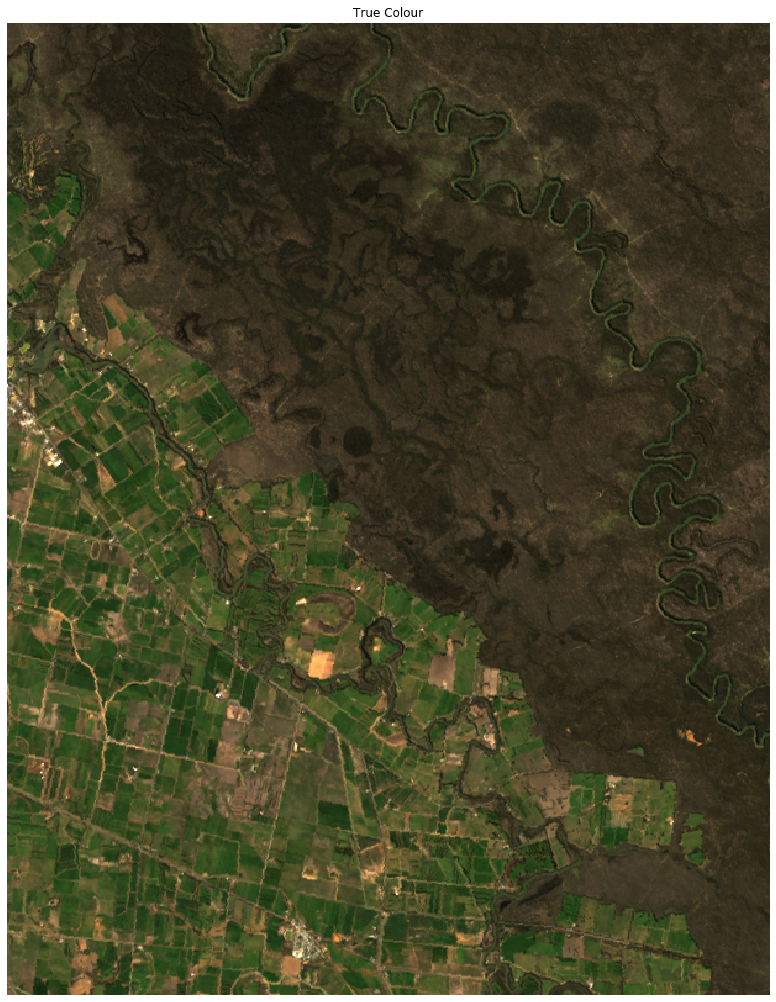

In [121]:
data_lst8_once = Masked_lst8_data.isel(time=0
                                      )

#Prepare geomedian imagery for plotting

rgb = data_lst8_once.to_array(dim='color').sel(color=[
    'red','green', 'blue']).transpose('y', 'x', 'color')
fake_saturation = 2000.0  #you may need to adjust this to get a clear image. higher numbers will make it darker, 
                                                                            #lower will make it ligher
rgb = rgb.astype('double')
clipped_visible = rgb.where(rgb<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)

fig = plt.figure(figsize =(15,15)) #edit size of plot 
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05) #set border dimensions
fig.patch.set_facecolor('white') #make border white 
fig.patch.set_alpha(0.99)#ensure border white
plt.axis('off')#remove axis 
plt.title('True Colour') #add title
plt.imshow(scaled, interpolation = 'nearest') #create image

In [128]:
#Do tassled Cap transformation
TCI = TasseledCapTools.thresholded_tasseled_cap(data_lst8,wetness_threshold=-1200, drop=True
                                                , drop_tc_bands=False)
tcw = TCI['wetness']
tcg = TCI['greenness']
tcb = TCI['brightness']


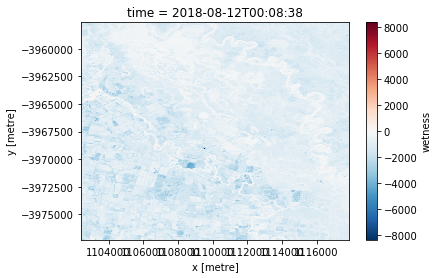

In [129]:
tcw.isel(time=0).plot()

In [130]:

classify_data_TCI = (TCI.isel(time=0).drop(['greenness_thresholded','brightness_thresholded','wetness_thresholded'])).stack(z=('x','y'))

classify_data_TCI

<xarray.Dataset>
Dimensions:     (z: 486984)
Coordinates:
    time        datetime64[ns] 2018-08-12T00:08:38
  * z           (z) MultiIndex
  - x           (z) float64 1.102e+06 1.102e+06 ... 1.118e+06 1.118e+06
  - y           (z) float64 -3.958e+06 -3.958e+06 ... -3.977e+06 -3.977e+06
Data variables:
    greenness   (z) float64 862.0 898.4 927.2 921.7 ... 939.6 867.0 887.5
    brightness  (z) float64 2.474e+03 2.391e+03 ... 1.957e+03 2.006e+03
    wetness     (z) float64 -1.299e+03 -1.176e+03 -1.104e+03 ... -867.6 -879.2
Attributes:
    crs:      EPSG: 3577

In [131]:
classify_data_TCI = classify_data_TCI.to_array()

In [132]:
classify_data_TCI=classify_data_TCI.transpose('z','variable')

In [133]:
results = clf.predict(classify_data_TCI)


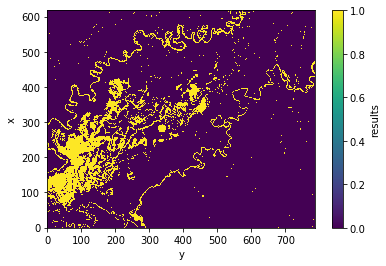

In [134]:
results_back = results.reshape(618,788)
#results_back = np.flip(results_back, axis = 0)
results_xr = xr.DataArray(results_back,dims=('x', 'y'),name='results')
results_xr = results_xr.astype('float32')

results_xr.plot()

In [135]:
results_xr = results_xr.transpose('y','x')
results_xr

<xarray.DataArray 'results' (y: 788, x: 618)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Dimensions without coordinates: y, x

In [136]:
Out_dataframe = TCI.isel(time=1)
Out_dataframe['classified_wet']=results_xr


Out_dataframe = Out_dataframe.drop(['greenness','greenness_thresholded','brightness_thresholded','brightness','wetness','wetness_thresholded'])
# Out_dataframe = Out_dataframe.isel(time=0)
Out_dataframe

<xarray.Dataset>
Dimensions:         (x: 618, y: 788)
Coordinates:
  * x               (x) float64 1.102e+06 1.102e+06 ... 1.118e+06 1.118e+06
  * y               (y) float64 -3.958e+06 -3.958e+06 ... -3.977e+06 -3.977e+06
    time            datetime64[ns] 2018-08-19T00:14:52.500000
Data variables:
    classified_wet  (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    crs:      EPSG: 3577

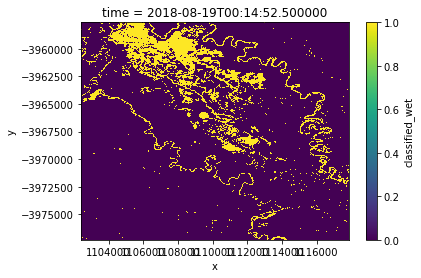

In [137]:
Out_dataframe.classified_wet.plot()

In [138]:
#write_geotiff(filename, dataset, profile_override=None, time_index=None)
#write_geotiff('/g/data/u46/users/ck9738/Datasets/Tasselled_cap_tifs/gunbower_decision_classified_20180812.tif',Out_dataframe)